In [835]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [836]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)

pd.set_option('display.max_rows',200)

In [837]:
#Read the data
data= pd.read_csv("Churn Modeling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [838]:
# Let's check the dimensions of the dataframe
data.shape

(10000, 14)

In [839]:
data=data.drop('RowNumber',axis=1)

In [840]:
# let's look at the statistical aspects of the dataframe
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.496849,38.943500,5.015400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.708600,10.613726,2.902931,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,305.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.250000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,865.000000,190.000000,30.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Treating Missing Values

In [842]:
pd.set_option('display.max_rows', data.shape[0]+1)

In [843]:
data.isnull().sum()*100/len(data)

CustomerId         0.00
Surname            0.00
CreditScore        0.03
Geography          0.00
Gender             0.00
Age                0.00
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [844]:
## Using the Median to impute missing values in the numerical columns
data["CreditScore"] = data["CreditScore"].fillna(data['CreditScore'].median())

In [845]:
data.isnull().sum()*100/len(data)

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [846]:
#Bucketing Age
df = data[data['Age'] <=100]

In [847]:
age_range= [0,20,40,60,10000]
age_labels = ['0-20','20-40','40-60','60+']
df['Age_new'] = pd.cut(df['Age'],age_range,labels = age_labels)


df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_new
0,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60
1,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60
2,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60
3,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40
4,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60


In [848]:
bins = [0, 20, 40, 60, 80, 100]

# bin the age column
df['Tenure_new'] = df['Tenure'].apply(lambda x: 'Low' if x<=4 else 'Medium' if x<=8 else 'High')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_new,Tenure_new
0,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,Low
1,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,Low
2,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,Medium
3,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,Low
4,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,Low


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

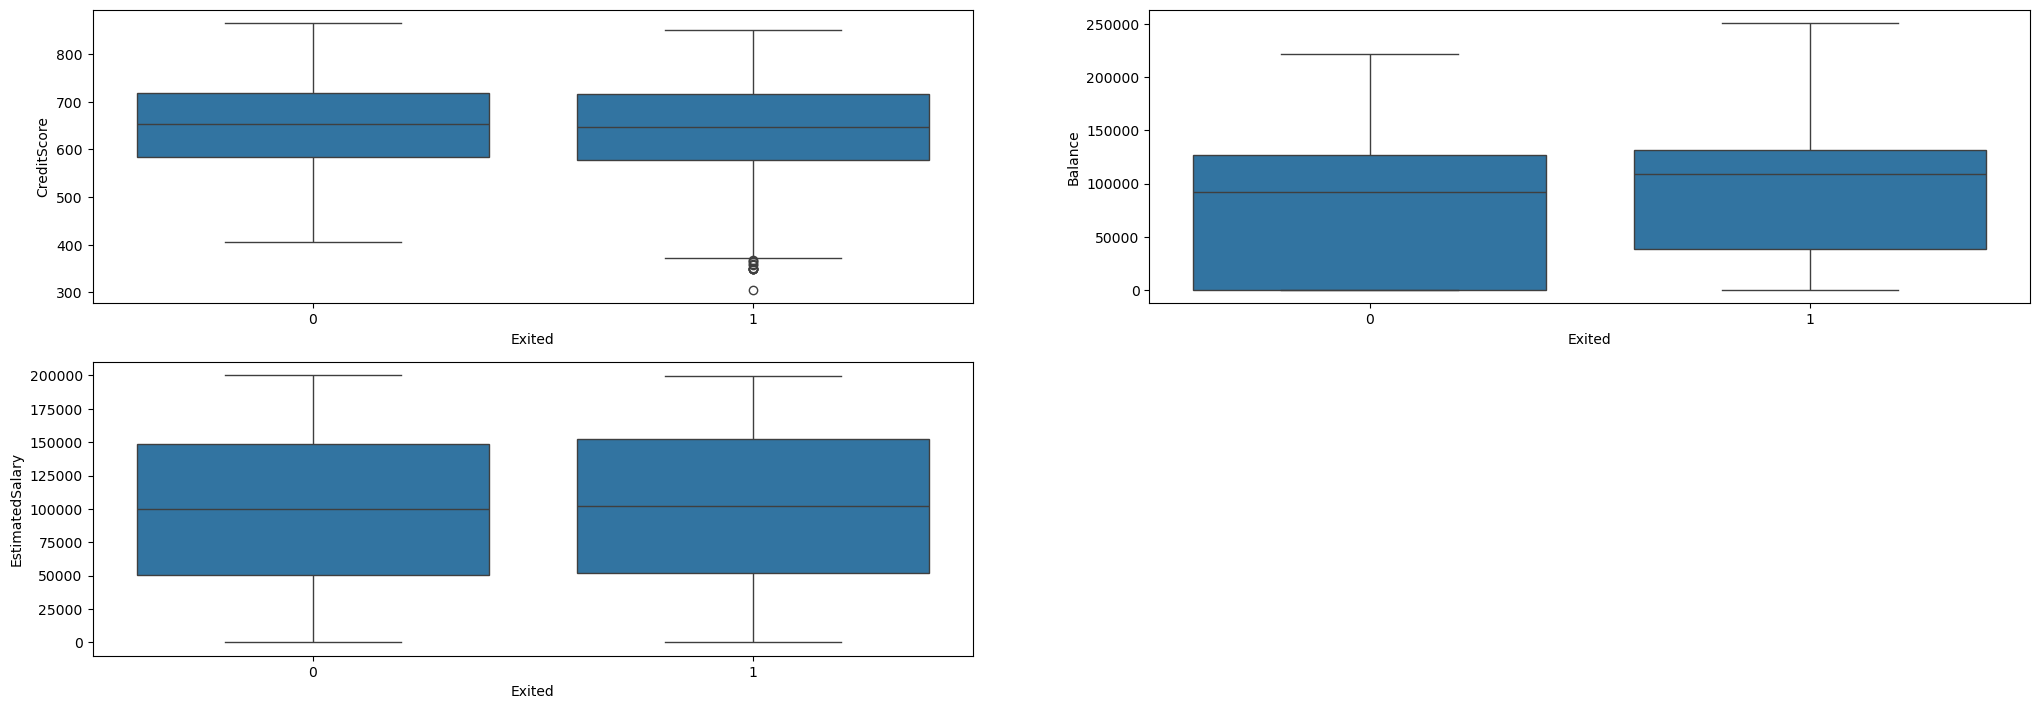

In [849]:
plt.figure(figsize=(25, 45))
plt.subplot(10,2,1)
sns.boxplot(y = 'CreditScore', x = 'Exited', data = df)
plt.subplot(10,2,2)
sns.boxplot(y = 'Balance', x = 'Exited', data = df)
plt.subplot(10,2,3)
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', data = df)

In [850]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_new,Tenure_new
0,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,40-60,Low
1,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-60,Low
2,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-60,Medium
3,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,20-40,Low
4,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-60,Low


### No outlier in the continuous variables

Text(0.5, 1.0, 'Tenure_new Distribution')

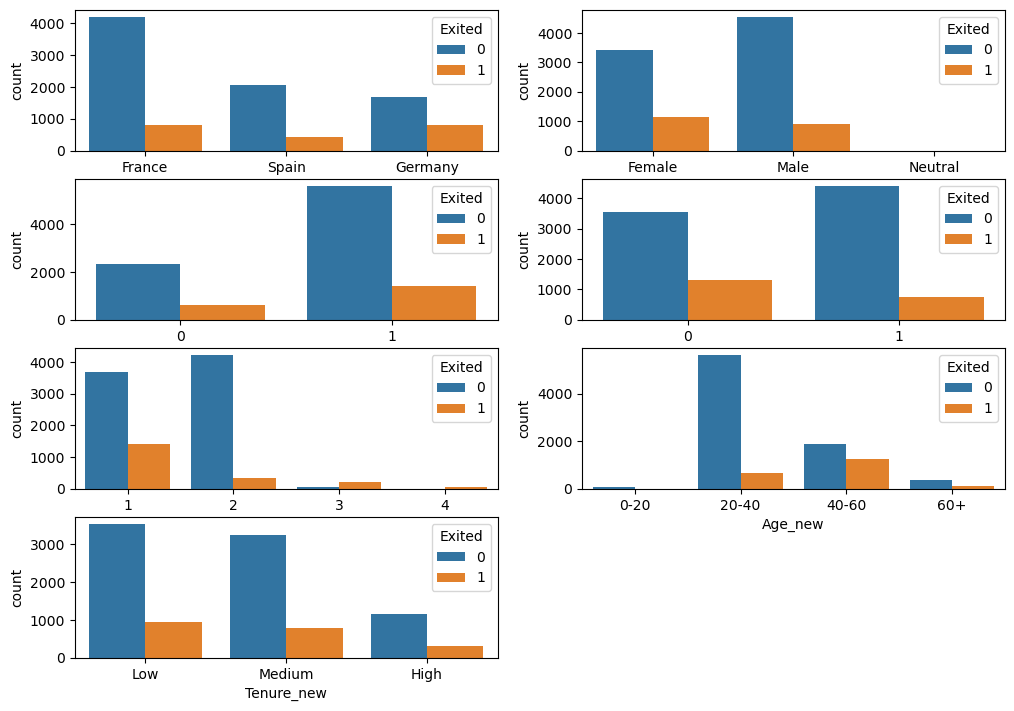

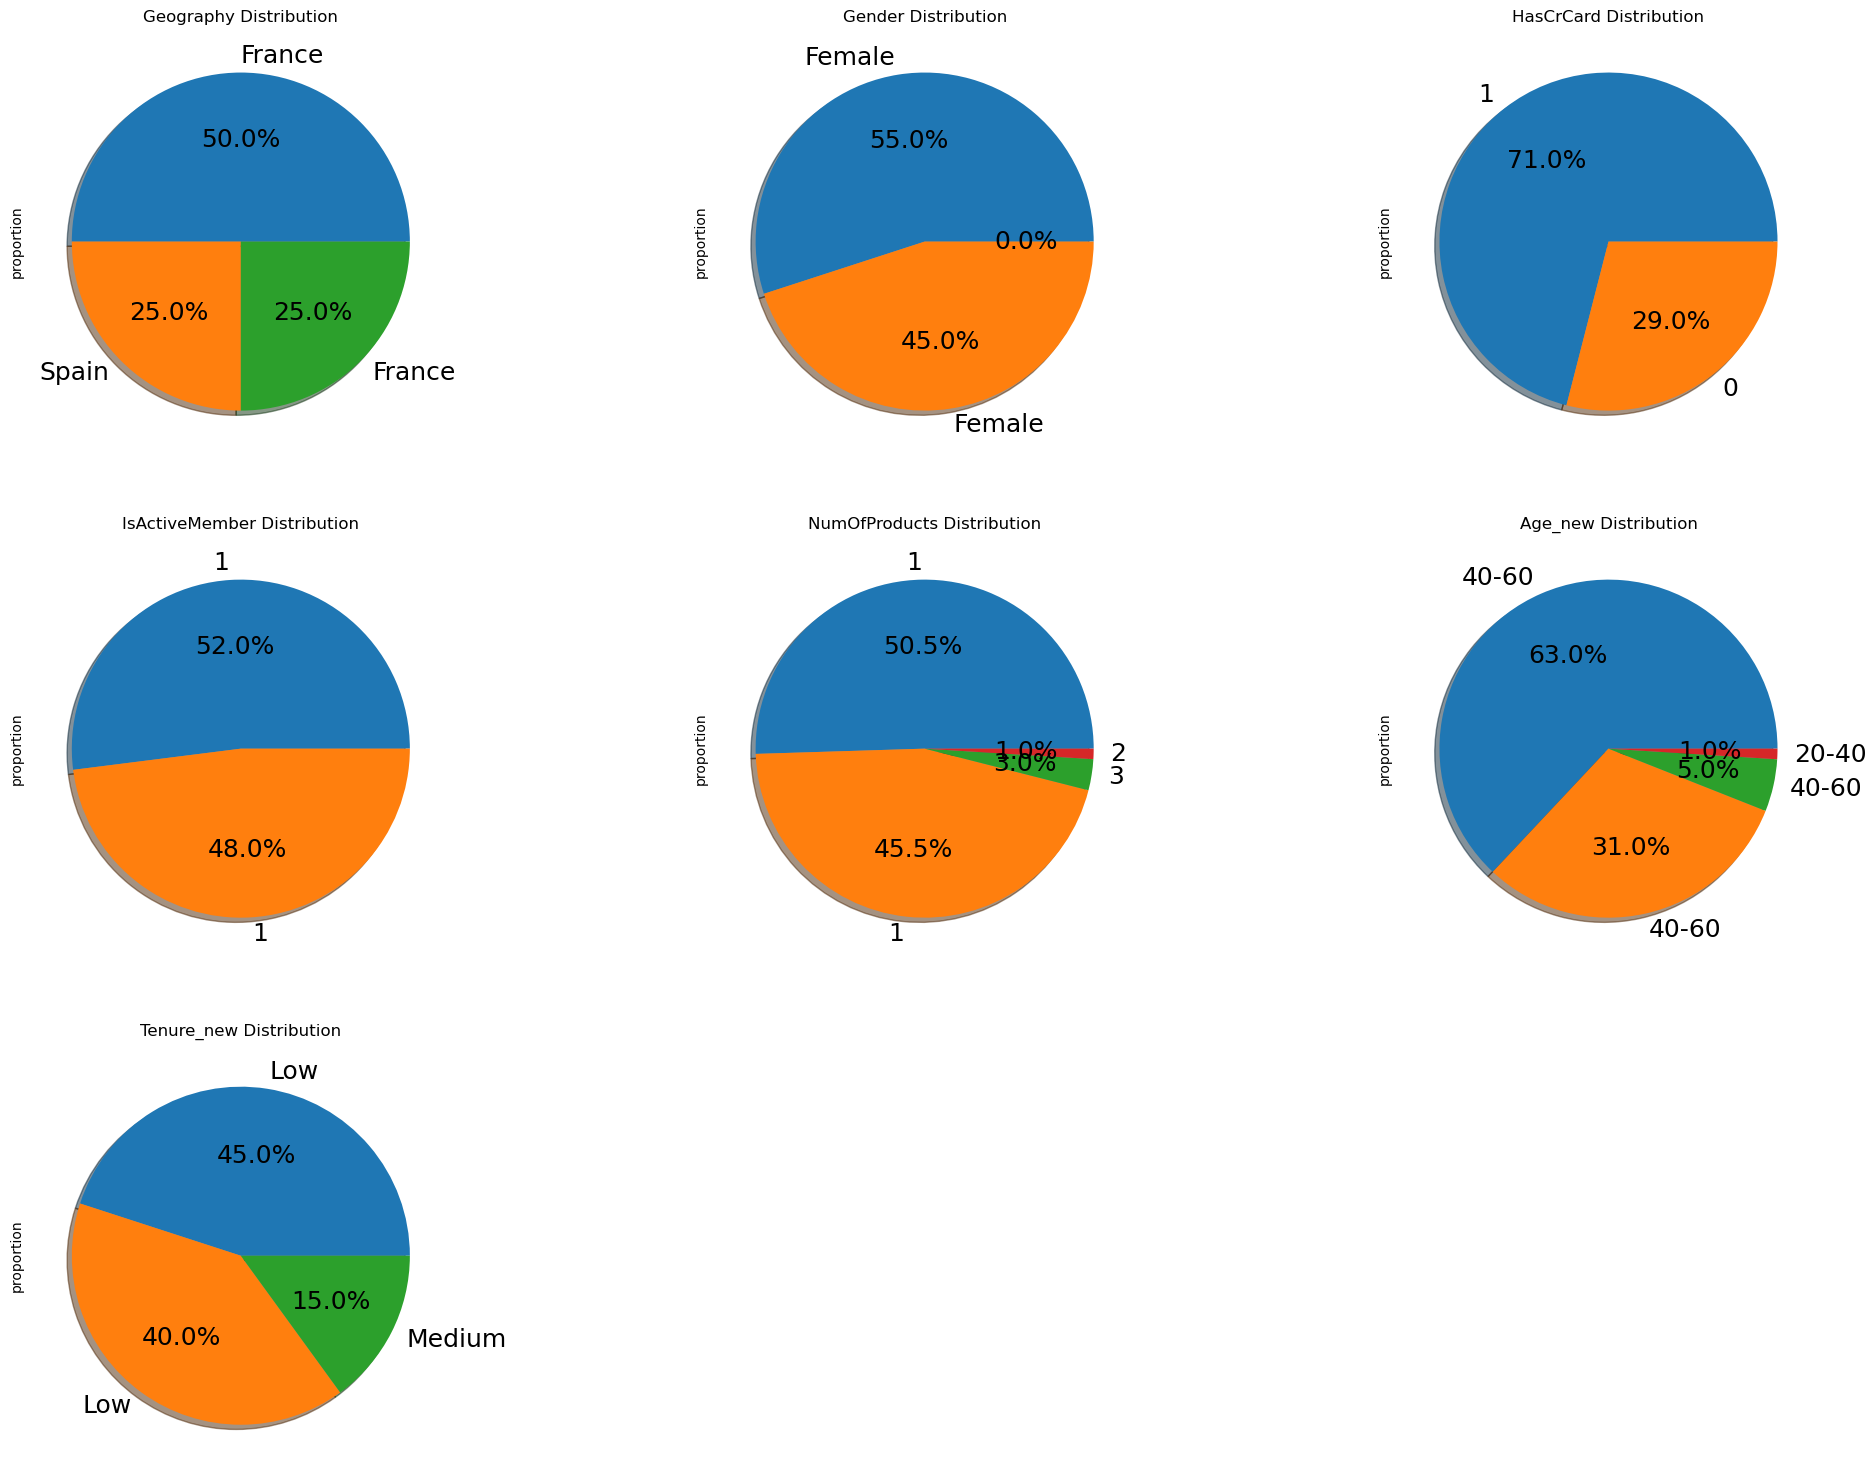

In [852]:
#Univariate
plt.figure(figsize = (12, 15))
features = ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Age_new','Tenure_new']
percentage_df = pd.DataFrame()


for i in enumerate(features):
    plt.subplot(7, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'Exited', data = df)
    plt.xlabel(i[1])


count_g = round(df['Geography'].value_counts(normalize=True)*100)
count_ge = round(df['Gender'].value_counts(normalize=True)*100)
count_cr = round(df['HasCrCard'].value_counts(normalize=True)*100)
count_ac = round(df['IsActiveMember'].value_counts(normalize=True)*100)
count_pr = round(df['NumOfProducts'].value_counts(normalize=True)*100)
count_ag = round(df['Age_new'].value_counts(normalize=True)*100)
count_te = round(df['Tenure_new'].value_counts(normalize=True)*100)

plt.figure(figsize=(25, 45))
plt.subplot(7,3,1)
count_g.plot.pie(autopct='%1.1f%%',labels=df['Geography'],shadow=True,textprops={'fontsize': 18})
plt.title('Geography Distribution')

plt.subplot(7,3,2)
count_ge.plot.pie(autopct='%1.1f%%',labels=df['Gender'],shadow=True,textprops={'fontsize': 18})
plt.title('Gender Distribution')

plt.subplot(7,3,3)
count_cr.plot.pie(autopct='%1.1f%%',labels=df['HasCrCard'],shadow=True,textprops={'fontsize': 18})
plt.title('HasCrCard Distribution')


plt.subplot(7,3,4)
count_ac.plot.pie(autopct='%1.1f%%',labels=df['IsActiveMember'],shadow=True,textprops={'fontsize': 18})
plt.title('IsActiveMember Distribution')

plt.subplot(7,3,5)
count_pr.plot.pie(autopct='%1.1f%%',labels=df['NumOfProducts'],shadow=True,textprops={'fontsize': 18})
plt.title('NumOfProducts Distribution')

plt.subplot(7,3,6)
count_ag.plot.pie(autopct='%1.1f%%',labels=df['Age_new'],shadow=True,textprops={'fontsize': 18})
plt.title('Age_new Distribution')

plt.subplot(7,3,7)
count_te.plot.pie(autopct='%1.1f%%',labels=df['Tenure_new'],shadow=True,textprops={'fontsize': 18})
plt.title('Tenure_new Distribution')



In [853]:
Churn_Percentage = round((df.Exited.sum()/len(df.Exited))*100,2)
Churn_Percentage

20.37

#### Creating Dummies for Categorical Variables

In [855]:
Geography_d = pd.get_dummies(df['Geography'], prefix='Geography')
Gender_d = pd.get_dummies(df['Gender'], prefix='Gender')
HasCrCard_d = pd.get_dummies(df['HasCrCard'], prefix='HasCrCard')
IsActiveMember_d = pd.get_dummies(df['IsActiveMember'], prefix='IsActiveMember')
NumOfProducts_d = pd.get_dummies(df['NumOfProducts'], prefix='NumOfProducts')
Age_new_d = pd.get_dummies(df['Age_new'], prefix='Age_new')
Tenure_new_d = pd.get_dummies(df['Tenure_new'], prefix='Tenure_new')


In [856]:
# Drop the old variables as we have created dummies for them
df.drop(['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Tenure','Tenure_new','Age_new','Age'],axis=1,inplace=True)

In [857]:
# Add the new dummy columns to the dataframe
df = pd.concat([df, Geography_d, Gender_d, HasCrCard_d,
                    IsActiveMember_d,NumOfProducts_d,Age_new_d,Tenure_new_d], axis =1)

In [858]:
df.head()

,CustomerId,Surname,CreditScore,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Gender_Neutral,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_new_0-20,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Low,Tenure_new_Medium
0,15634602,Hargrave,619.0,0.00,101348.88,1,True,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,True,False
1,15647311,Hill,608.0,83807.86,112542.58,0,False,False,True,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,False
2,15619304,Onio,502.0,159660.80,113931.57,1,True,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True
3,15701354,Boni,699.0,0.00,93826.63,0,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False
4,15737888,Mitchell,850.0,125510.82,79084.10,0,False,False,True,True,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,True,False


In [859]:
#Drop values to remove dummy variable trap
df.drop(['Geography_France','Gender_Neutral','HasCrCard_0','IsActiveMember_0','NumOfProducts_4','Age_new_0-20','Tenure_new_Low'],axis=1,inplace=True)

In [860]:
#Dropping CustomerID and Surname Columns as they won't be of any use in the models
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [861]:
cat_cols = ['Exited','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','HasCrCard_1','IsActiveMember_1',
            'NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','Tenure_new_High','Tenure_new_Medium',
           'Age_new_20-40','Age_new_40-60','Age_new_60+']


In [862]:
df.columns

Index(['CreditScore', 'Balance', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'HasCrCard_1', 'IsActiveMember_1', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'Age_new_20-40', 'Age_new_40-60', 'Age_new_60+',
       'Tenure_new_High', 'Tenure_new_Medium'],
      dtype='object')

In [863]:
num_cols = [column for column in df.columns if column not in cat_cols]

(3.5, -0.5)

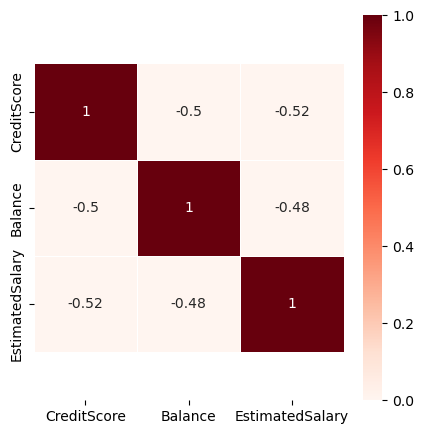

In [864]:
fig, ax = plt.subplots(figsize=(5,5)) 
corr_matrix= df[num_cols].corr()
ax = sns.heatmap(corr_matrix.corr(), annot = True, cmap = 'Reds',linewidths=.5,vmin=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### None of the continuous variables are highly correlated

In [866]:
### Correlation between target and all other variables
df.drop("Exited", axis=1).apply(lambda x: x.corr(df.Exited))

CreditScore         -0.027776
Balance              0.118430
EstimatedSalary      0.011999
Geography_Germany    0.173440
Geography_Spain     -0.052728
Gender_Female        0.105849
Gender_Male         -0.107015
HasCrCard_1         -0.007185
IsActiveMember_1    -0.156253
NumOfProducts_1      0.185368
NumOfProducts_2     -0.292406
NumOfProducts_3      0.255852
Age_new_20-40       -0.313498
Age_new_40-60        0.322297
Age_new_60+          0.024156
Tenure_new_High      0.010287
Tenure_new_Medium   -0.021505
dtype: float64

# Step 5: MODEL BUILDING

In [868]:
from sklearn.model_selection import train_test_split

In [869]:
# Putting feature variable to X
X = df.drop('Exited', axis=1)

X.head()

,CreditScore,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Medium
0,619.0,0.00,101348.88,False,False,True,False,True,True,True,False,False,False,True,False,False,False
1,608.0,83807.86,112542.58,False,True,True,False,False,True,True,False,False,False,True,False,False,False
2,502.0,159660.80,113931.57,False,False,True,False,True,False,False,False,True,False,True,False,False,True
3,699.0,0.00,93826.63,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,850.0,125510.82,79084.10,False,True,True,False,True,True,True,False,False,False,True,False,False,False


In [870]:
# Putting response variable to y
y = df['Exited']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [871]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [872]:
from collections import Counter 
print(sorted(Counter(y_train).items()))

[(0, 5572), (1, 1426)]


In [873]:
print(sorted(Counter(y_test).items()))

[(0, 2389), (1, 611)]


In [874]:
### Feature Scaling

In [875]:
from sklearn.preprocessing import StandardScaler

In [876]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','HasCrCard_1','IsActiveMember_1',
            'NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','Tenure_new_High','Tenure_new_Medium',
           'Age_new_20-40','Age_new_40-60','Age_new_60+']

target_col = ['Exited']

X_train[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in df.columns if col not in cat_cols + target_col]])

X_train.head()

,CreditScore,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Medium
7891,0.280283,0.395588,1.630270,True,False,False,True,False,True,False,True,False,False,True,False,False,False
9986,0.228708,1.716185,-1.145090,True,False,False,True,False,True,False,True,False,False,True,False,False,False
920,0.806349,-1.223140,-1.577631,False,False,False,True,False,True,False,True,False,False,True,False,False,True
8432,-1.772406,0.726975,-1.636621,False,False,False,True,False,True,True,False,False,False,True,False,False,True
5950,1.889426,0.574621,0.703269,True,False,True,False,True,False,False,False,True,False,True,False,False,True


### Scale the Test Set

In [878]:
# Scale the test set
X_test[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in df.columns if col not in cat_cols + target_col]])

In [879]:
from collections import Counter 
print(sorted(Counter(y_train).items()))

[(0, 5572), (1, 1426)]


## Logistic Regression

In [881]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lreg = LogisticRegression(class_weight='balanced')
lreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [882]:
pred_probs_test = lreg.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, pred_probs_test)

0.826844806289602

In [883]:
pred_test = lreg.predict_proba(X_test)
y_pred = lreg.predict(X_test)

In [884]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring= 'recall',cv=5)
grid_search.fit(X,y)

best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=10)

In [885]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7456666666666667
F1 score:  0.5493207324276432
Recall:  0.7610474631751227
Precision:  0.4297597042513863

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      2389
           1       0.43      0.76      0.55       611

    accuracy                           0.75      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.75      0.77      3000


 confussion matrix:
 [[1772  617]
 [ 146  465]]


In [886]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [887]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Exited,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.826844806289602


In [888]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [889]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [890]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head(100)

,Exited,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.379051,1,1,1,1,0,0,0,0,0,0
1,0,0.756223,1,1,1,1,1,1,1,1,0,0
2,0,0.737209,1,1,1,1,1,1,1,1,0,0
3,0,0.751342,1,1,1,1,1,1,1,1,0,0
4,0,0.555599,1,1,1,1,1,1,0,0,0,0
5,1,0.971113,1,1,1,1,1,1,1,1,1,1
6,0,0.131991,1,1,0,0,0,0,0,0,0,0
7,0,0.091867,1,0,0,0,0,0,0,0,0,0
8,0,0.417676,1,1,1,1,1,0,0,0,0,0
9,0,0.100031,1,1,0,0,0,0,0,0,0,0


In [891]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Exited, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.203667  1.000000  0.000000
0.1   0.1  0.330667  0.985270  0.163248
0.2   0.2  0.486667  0.934534  0.372122
0.3   0.3  0.581000  0.887070  0.502721
0.4   0.4  0.707000  0.798691  0.683550
0.5   0.5  0.745667  0.761047  0.741733
0.6   0.6  0.813667  0.630115  0.860611
0.7   0.7  0.825667  0.574468  0.889912
0.8   0.8  0.841667  0.366612  0.963165
0.9   0.9  0.826000  0.188216  0.989117


<Axes: xlabel='prob'>

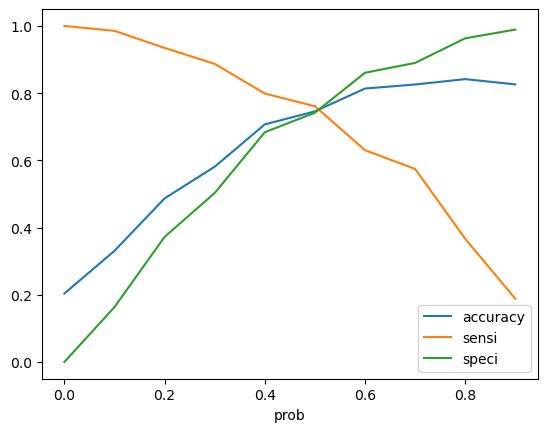

In [892]:
# Cutoff between accuracy, sensitivity/recall and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [893]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.Exited,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5170150865759959]


In [894]:
#Creating new column 'predicted' with 1 if Churn_Prob>0.48 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.517 else 0)

y_pred_final.pred_churn.value_counts(normalize = True)

pred_churn
0    0.650333
1    0.349667
Name: proportion, dtype: float64

In [895]:
y_pred_final = y_pred_final[['Exited','churn_prob','pred_churn']]

In [896]:
# Recall
recall_score(y_pred_final.Exited, y_pred_final.pred_churn)

0.7545008183306056

In [897]:
# Precision
precision_score(y_pred_final.Exited, y_pred_final.pred_churn)

0.43946615824594853

## DECISION TREES

In [899]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [900]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','HasCrCard_1','IsActiveMember_1',
            'NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','Tenure_new_High','Tenure_new_Medium',
           'Age_new_20-40','Age_new_40-60','Age_new_60+']

target_col = ['Exited']

X_train[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in df.columns if col not in cat_cols + target_col]])

X_train.head()

,CreditScore,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Medium
7891,0.280283,0.395588,1.630270,True,False,False,True,False,True,False,True,False,False,True,False,False,False
9986,0.228708,1.716185,-1.145090,True,False,False,True,False,True,False,True,False,False,True,False,False,False
920,0.806349,-1.223140,-1.577631,False,False,False,True,False,True,False,True,False,False,True,False,False,True
8432,-1.772406,0.726975,-1.636621,False,False,False,True,False,True,True,False,False,False,True,False,False,True
5950,1.889426,0.574621,0.703269,True,False,True,False,True,False,False,False,True,False,True,False,False,True


In [901]:
# Scaling the test set
X_test[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in df.columns if col not in cat_cols + target_col]])

In [902]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [903]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
y_pred1 = dt1.predict(X_test)

print ('Accuracy: ', accuracy_score(y_test, y_pred1))
print ('F1 score: ', f1_score(y_test, y_pred1))
print ('Recall: ', recall_score(y_test, y_pred1))
print ('Precision: ', precision_score(y_test, y_pred1))
# classification report
print(classification_report(y_test, y_pred1))

Accuracy:  0.72
F1 score:  0.5409836065573771
Recall:  0.8101472995090017
Precision:  0.40607054963084493
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      2389
           1       0.41      0.81      0.54       611

    accuracy                           0.72      3000
   macro avg       0.67      0.75      0.67      3000
weighted avg       0.83      0.72      0.75      3000



In [904]:
from sklearn.metrics import make_scorer
scorers = {'recall_score': make_scorer(recall_score)}
refit_score = 'recall_score'

In [905]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight='balanced')
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

In [906]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.003605,0.000306,0.001293,0.000090,1,{'max_depth': 1},0.856140,0.585965,0.828671,0.543860,0.870175,0.736962,0.141738,3,0.836985,0.616126,0.843860,0.626643,0.833479,0.751419,0.106277
1,0.004799,0.000031,0.001199,0.000011,2,{'max_depth': 2},0.603509,0.484211,0.548951,0.470175,0.547368,0.530843,0.048449,14,0.501315,0.531113,0.575439,0.534619,0.515337,0.531564,0.024951
2,0.005907,0.000072,0.001160,0.000031,3,{'max_depth': 3},0.715789,0.589474,0.667832,0.589474,0.659649,0.644444,0.048810,9,0.617879,0.649430,0.680702,0.649430,0.639790,0.647446,0.020232
3,0.007133,0.000050,0.001173,0.000017,4,{'max_depth': 4},0.838596,0.754386,0.772727,0.684211,0.726316,0.755247,0.051257,1,0.802805,0.823839,0.763158,0.755478,0.713409,0.771738,0.038522
4,0.008366,0.000036,0.001172,0.000014,5,{'max_depth': 5},0.747368,0.603509,0.828671,0.747368,0.831579,0.751699,0.082829,2,0.704645,0.686240,0.830702,0.838738,0.822086,0.776482,0.066632


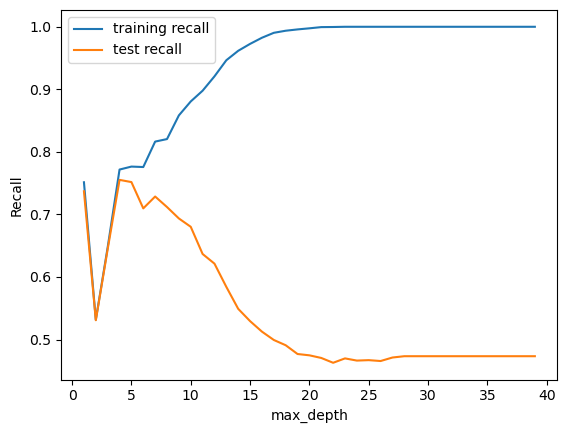

In [907]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_max_depth"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [908]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

In [909]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.015794,0.000298,0.001352,0.000082,5,{'min_samples_leaf': 5},0.614035,0.596491,0.611888,0.589474,0.712281,0.624834,0.044687,10,0.920245,0.924628,0.928947,0.927257,0.936897,0.927595,0.005501
1,0.012810,0.000277,0.001272,0.000007,25,{'min_samples_leaf': 25},0.757895,0.663158,0.716783,0.708772,0.740351,0.717392,0.032198,9,0.835232,0.836985,0.821930,0.850131,0.829097,0.834675,0.009361
2,0.011282,0.000341,0.001230,0.000034,45,{'min_samples_leaf': 45},0.782456,0.652632,0.783217,0.708772,0.726316,0.730678,0.049054,7,0.810692,0.783523,0.821053,0.815951,0.770377,0.800319,0.019801
3,0.010166,0.000055,0.001211,0.000048,65,{'min_samples_leaf': 65},0.771930,0.736842,0.779720,0.743860,0.785965,0.763663,0.019673,3,0.791411,0.802805,0.807895,0.812445,0.794917,0.801894,0.007833
4,0.009190,0.000091,0.001193,0.000038,85,{'min_samples_leaf': 85},0.764912,0.743860,0.699301,0.708772,0.789474,0.741264,0.033784,5,0.751972,0.816827,0.754386,0.773883,0.802805,0.779974,0.025905


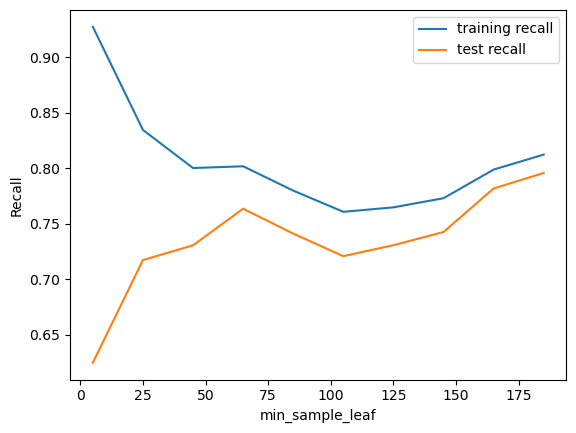

In [910]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_sample_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [911]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

In [912]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.017286,0.000226,0.001342,0.000066,5,{'min_samples_split': 5},0.543860,0.522807,0.552448,0.512281,0.540351,0.534349,0.014658,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.015905,0.000274,0.001282,0.000005,25,{'min_samples_split': 25},0.670175,0.596491,0.664336,0.656140,0.684211,0.654271,0.030307,9,0.944785,0.918493,0.922807,0.927257,0.937774,0.930223,0.009700
2,0.014455,0.000265,0.001219,0.000037,45,{'min_samples_split': 45},0.726316,0.666667,0.681818,0.701754,0.722807,0.699872,0.023054,8,0.897458,0.906223,0.864912,0.901840,0.890447,0.892176,0.014594
3,0.013691,0.000282,0.001192,0.000008,65,{'min_samples_split': 65},0.736842,0.659649,0.706294,0.694737,0.757895,0.711083,0.034031,6,0.880806,0.877301,0.858772,0.861525,0.887818,0.873244,0.011250
4,0.013140,0.000327,0.001191,0.000014,85,{'min_samples_split': 85},0.743860,0.649123,0.702797,0.701754,0.740351,0.707577,0.034247,7,0.831727,0.835232,0.829825,0.845749,0.818580,0.832223,0.008765


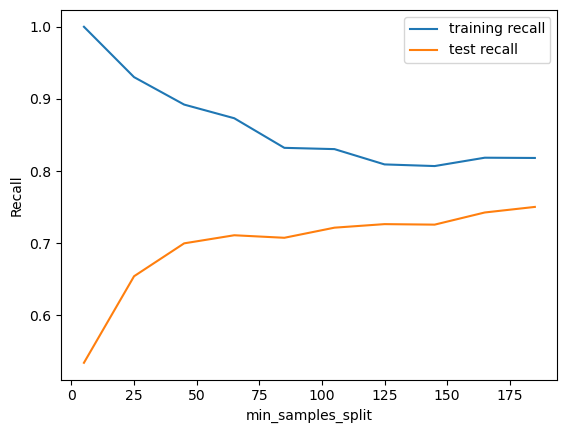

In [913]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [914]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 100, 5),
    'min_samples_leaf': range(25, 175, 25),
    'min_samples_split': range(0, 150, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit=refit_score,
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 100, 5),
                         'min_samples_leaf': range(25, 175, 25),
                         'min_samples_split': range(0, 150, 25)},
             refit='recall_score', verbose=1)

In [915]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Recall", grid_search.best_score_)

Best Recall 0.7606430103134891


In [916]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=25, min_samples_split=125)


In [917]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy",
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=125,class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=25, min_samples_split=125,
                       random_state=100)

In [918]:
y_pred_default = clf_gini.predict(X_test)
cm2 =confusion_matrix(y_test,y_pred_default)
cm2

array([[1835,  554],
       [ 167,  444]])

In [919]:
TN = cm2[0,0] # true negatives
TP = cm2[1,1] # true positives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives
#
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false positive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7266775777414075
Specificity:  0.768103809125157
false positive rate:  0.23189619087484303
positive predictive value:  0.44488977955911824
Negative predictive value:  0.9165834165834166
Misclassification Rate:  0.24033333333333334


## Random Forest

In [921]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [922]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','HasCrCard_1','IsActiveMember_1',
            'NumOfProducts_1','NumOfProducts_2','NumOfProducts_3','Tenure_new_High','Tenure_new_Medium',
           'Age_new_20-40','Age_new_40-60','Age_new_60+']

target_col = ['Exited']

X_train[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in df.columns if col not in cat_cols + target_col]])

X_train.head()

,CreditScore,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Medium
7891,0.280283,0.395588,1.630270,True,False,False,True,False,True,False,True,False,False,True,False,False,False
9986,0.228708,1.716185,-1.145090,True,False,False,True,False,True,False,True,False,False,True,False,False,False
920,0.806349,-1.223140,-1.577631,False,False,False,True,False,True,False,True,False,False,True,False,False,True
8432,-1.772406,0.726975,-1.636621,False,False,False,True,False,True,True,False,False,False,True,False,False,True
5950,1.889426,0.574621,0.703269,True,False,True,False,True,False,False,False,True,False,True,False,False,True


In [923]:
# Scaling the test set
X_test[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in df.columns if col not in cat_cols + target_col]])

In [924]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [925]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [926]:
# Make predictions
prediction_test = rf.predict(X_test)
metrics.recall_score(y_test, prediction_test)

0.4402618657937807

In [927]:
confusion_rf=confusion_matrix(y_test,prediction_test)
confusion_rf

array([[2260,  129],
       [ 342,  269]])

In [928]:
TN = confusion_rf[0,0] # true negatives
TP = confusion_rf[1,1] # true positives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.4402618657937807
Specificity:  0.9460025115110925
false postive rate:  0.053997488488907494
positive predictive value:  0.6758793969849246
Negative predictive value:  0.8685626441199078
Misclassification Rate:  0.157


## Hyperparameter Tuning

In [930]:
# Import necessary libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True, n_jobs = -1)
rf.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

In [931]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.214224,0.009370,0.007463,0.001664,2,{'max_depth': 2},0.635548,0.666068,0.712108,0.652915,0.673250,0.667978,0.025524,4,0.648048,0.653656,0.719542,0.665694,0.665545,0.670497,0.025458
1,0.437418,0.013793,0.015005,0.001393,7,{'max_depth': 7},0.769300,0.789946,0.789238,0.787444,0.789048,0.784995,0.007890,3,0.793629,0.792956,0.797846,0.790666,0.785554,0.792130,0.004025
2,0.598825,0.007659,0.024456,0.000583,12,{'max_depth': 12},0.922801,0.913824,0.936323,0.943498,0.960503,0.935390,0.016253,2,0.959623,0.964558,0.960960,0.957370,0.963212,0.961145,0.002550
3,0.608331,0.033846,0.023453,0.000689,17,{'max_depth': 17},0.974865,0.978456,0.999103,0.999103,1.000000,0.990306,0.011203,1,0.999776,0.999776,0.999551,0.999776,1.000000,0.999776,0.000142


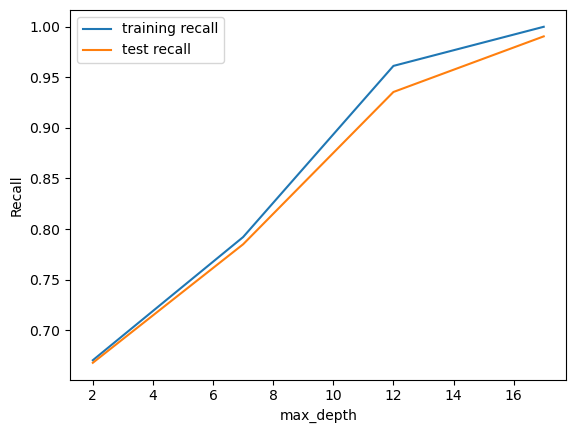

In [932]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [933]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'n_estimators': range(100, 1500, 400)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

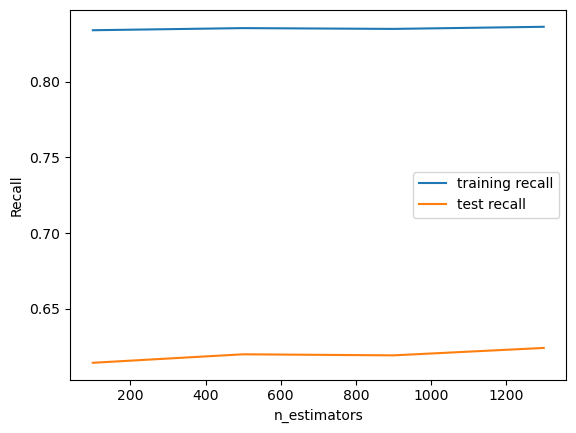

In [934]:
## scores of GridSearch CV
scores = rf.cv_results_

## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [935]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(100, 400, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

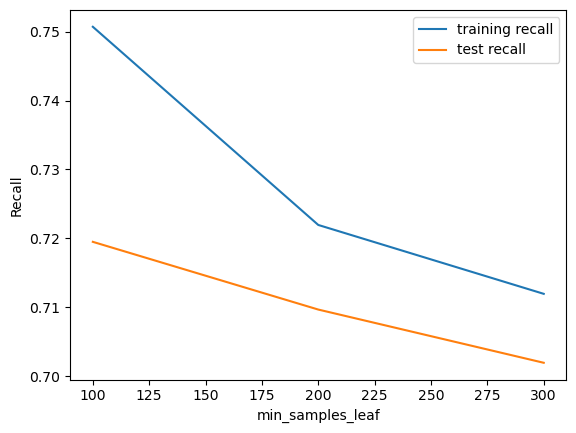

In [936]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [937]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,15,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')



# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'max_features': [10, 15, 20]}, refit='recall_score',
             return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

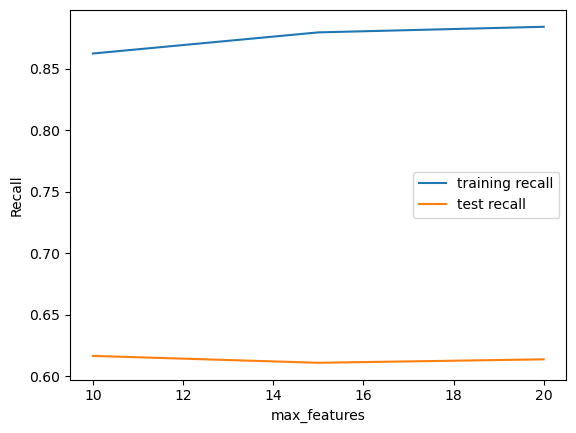

In [938]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [939]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 100)},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score, response_method='predict')})

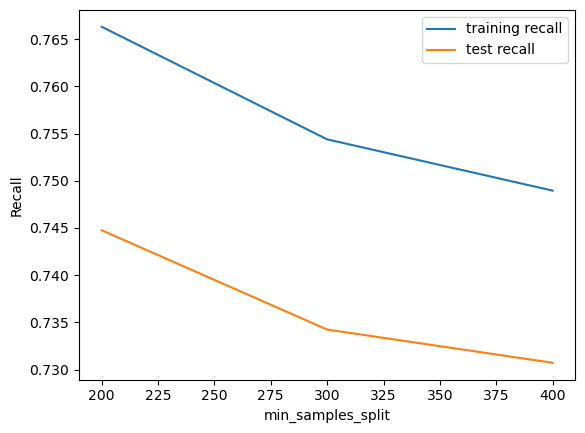

In [940]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [1049]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 25),
    'min_samples_split': range(200, 400, 50),
    'n_estimators': [700,800,900], 
    'max_features': [10,15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, refit = refit_score,
                          cv = 3, n_jobs = -1,verbose = 1)

In [1053]:
# fit the grid search with the data
grid_search.fit(X_train, y_train)
# optimal accuracy score and hyperparameters

print('Recall is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Recall is 0.8332405732061208 using {'max_depth': 8, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 900}


In [1055]:
# Final RF Model

model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=300,
                             max_features=20,
                             n_estimators=900,class_weight='balanced')
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [1057]:
# Evaluation metrics
confusion_rf_all = metrics.confusion_matrix( y_test, prediction_test )
confusion_rf_all

array([[1681,  708],
       [ 132,  479]])

In [1059]:
TN = confusion_rf_all[0,0] # true negatives
TP = confusion_rf_all[1,1] # true positives
FP = confusion_rf_all[0,1] # false positives
FN = confusion_rf_all[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7839607201309329
Specificity:  0.7036416910841357
false postive rate:  0.2963583089158644
positive predictive value:  0.4035383319292334
Negative predictive value:  0.92719249862107
Misclassification Rate:  0.28


### Random Forest Recall for Training is 83% and for Testing is 78%

## XG Boost

In [732]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1061]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [1063]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [1065]:
# Scale the train set
scaler = StandardScaler()

cat_cols = ['Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','HasCrCard_1','IsActiveMember_1',
           'Age_new_(20, 40]','Age_new_(40, 60]','Age_new_(60, 80]','Age_new_(80, 100]']

target_col = ['Exited']

X_train[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.fit_transform(X_train[[col for col in df.columns if col not in cat_cols + target_col]])

X_train.head()

,CreditScore,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_1,IsActiveMember_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,Age_new_20-40,Age_new_40-60,Age_new_60+,Tenure_new_High,Tenure_new_Medium
7891,0.280283,0.395588,1.630270,True,False,False,True,False,True,-1.029000,1.094785,-0.162019,-1.321948,1.500619,-0.220333,-0.424383,-0.814505
9986,0.228708,1.716185,-1.145090,True,False,False,True,False,True,-1.029000,1.094785,-0.162019,-1.321948,1.500619,-0.220333,-0.424383,-0.814505
920,0.806349,-1.223140,-1.577631,False,False,False,True,False,True,-1.029000,1.094785,-0.162019,-1.321948,1.500619,-0.220333,-0.424383,1.227740
8432,-1.772406,0.726975,-1.636621,False,False,False,True,False,True,0.971817,-0.913421,-0.162019,-1.321948,1.500619,-0.220333,-0.424383,1.227740
5950,1.889426,0.574621,0.703269,True,False,True,False,True,False,-1.029000,-0.913421,6.172112,-1.321948,1.500619,-0.220333,-0.424383,1.227740


In [1069]:
# Scaling the test set
X_test[[col for col in df.columns if col not in cat_cols + target_col]] = scaler.transform(X_test[[col for col in df.columns if col not in cat_cols + target_col]])

In [1083]:
xgb_clf = XGBClassifier(n_estimators=100, 
                            learning_rate=0.1,
                            max_depth=5,
                            objective= 'multi:softmax',
                            num_class=3,
                            random_state=42)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall: .2f}")

Recall:  0.45


In [1089]:
xgb_clf = XGBClassifier(n_estimators=100, 
                            learning_rate=0.1,
                            max_depth=5,
                            objective= 'multi:softmax',
                            num_class=3,
                            random_state=42,eval_metric='logloss')

param_grid = {'n_estimators': [50,100,150],
              'learning_rate': [0.01,0.1,0.2],
              'max_depth': [3,5,7,9],
              'subsample': [0.8,1],
              'colsample_bytree': [0.8,1.0],
              'gamma': [0,0.1,0.2]
    
}

grid_search  =GridSearchCV(
    estimator= xgb_clf,
    param_grid=param_grid,
    scoring = 'recall',
    cv=3,
    verbose=1
)

grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
recall = recall_score(y_test,y_pred)

print(f"Best Parameters: {best_params}")
print(f"Recall: {recall: .2f}")

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Recall:  0.46


In [1101]:
# Final RF Model

model_xgb = XGBClassifier(bootstrap=True,
                             max_depth=7,
                             colsample_bytree=1.0, 
                             gamma=0,
                             learning_rate=0.2,
                             n_estimators=100,subsample=1)
model_xgb.fit(X_train, y_train)

# Make predictions
prediction_test = model_xgb.predict(X_test)

In [1103]:
# Evaluation metrics
confusion_xgb_all = metrics.confusion_matrix(y_test, prediction_test )
confusion_xgb_all

array([[2259,  130],
       [ 317,  294]])

In [1105]:
TN = confusion_xgb_all[0,0] # true negatives
TP = confusion_xgb_all[1,1] # true positives
FP = confusion_xgb_all[0,1] # false positives
FN = confusion_xgb_all[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.48117839607201307
Specificity:  0.945583926329008
false postive rate:  0.05441607367099205
positive predictive value:  0.6933962264150944
Negative predictive value:  0.8769409937888198
Misclassification Rate:  0.149
